<a href="https://colab.research.google.com/github/AylinNaebzadeh/Complex-Dynamic-Network/blob/main/Assignment_2_Wiki_Vote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Directed** graph (each unordered pair of nodes is saved once): Wiki-Vote.txt 
Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.

**Nodes**: 7115 

**Edges**: 103689

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from itertools import chain
from collections import Counter
from operator import itemgetter
import pickle
import json

In [2]:
G = nx.read_edgelist("Wiki-Vote.txt", nodetype=int, create_using=nx.DiGraph(), comments='#')
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
print(f"The number of nodes in the graph network is: {number_of_nodes}")
print(f"The number of edges in the graph network is: {number_of_edges}")

The number of nodes in the graph network is: 7115
The number of edges in the graph network is: 103689


In [ ]:
plt.figure(figsize =(12, 8))
nx.draw_networkx(G, with_labels = True)

In [4]:
degrees = G.degree()
degree_values = [v for k, v in degrees]
sum_of_edges = sum(degree_values)

# Calculating the average is just a matter of division by the number of nodes.
average_degree = sum_of_edges / float(number_of_nodes)
print(f"The average degree in the graph network is: {average_degree}")

# For Directed Graphs I think is better to calculate both In-degree and Out-degree values.
avg_in_degree_value = sum(d for n, d in G.in_degree()) / float(number_of_nodes)
print(f"The average in degree in the graph network is: {avg_in_degree_value}")

avg_out_degree_value = sum(d for n, d in G.out_degree()) / float(number_of_nodes)
print(f"The average out degree in the graph network is: {avg_out_degree_value}")


The average degree in the graph network is: 29.146591707659873
The average in degree in the graph network is: 14.573295853829936
The average out degree in the graph network is: 14.573295853829936


In [5]:
graph_density = nx.density(G)
print(f"The density of the graph network is: {graph_density}")

The density of the graph network is: 0.0020485375110809584


In [6]:
"""
  Transitiity is a global metric for the network.

      Σ(triangles centered at node i)
  C = ----------------------------------
      Σ(triples centered at node i)
"""
graph_transitivity = nx.transitivity(G)
print(f"The transitivity of the graph network is: {graph_transitivity}")

The transitivity of the graph network is: 0.05285122817867548


In [7]:
"""
          triangles centered at node i           1
  C(i) = -------------------------------,  C = ----- Σ(i)C(i)
          triples centered at node i             N
        
"""
average_clustering = nx.average_clustering(G)
print(f"The average clustering value of the graph network is: {average_clustering}")

The average clustering value of the graph network is: 0.08156344522820935


In [8]:
network_diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(f"The diameter in the graph network is: {network_diameter}")

The diameter in the graph network is: 10


In [9]:
path_lengths = (y.values() for (x, y) in nx.shortest_path_length(G))
average_shortest_path_length = statistics.mean(chain.from_iterable(path_lengths))
print(f"The average shortest path length of the graph network is: {average_shortest_path_length}")

The average shortest path length of the graph network is: 3.339022669472223


In [10]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """
    Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

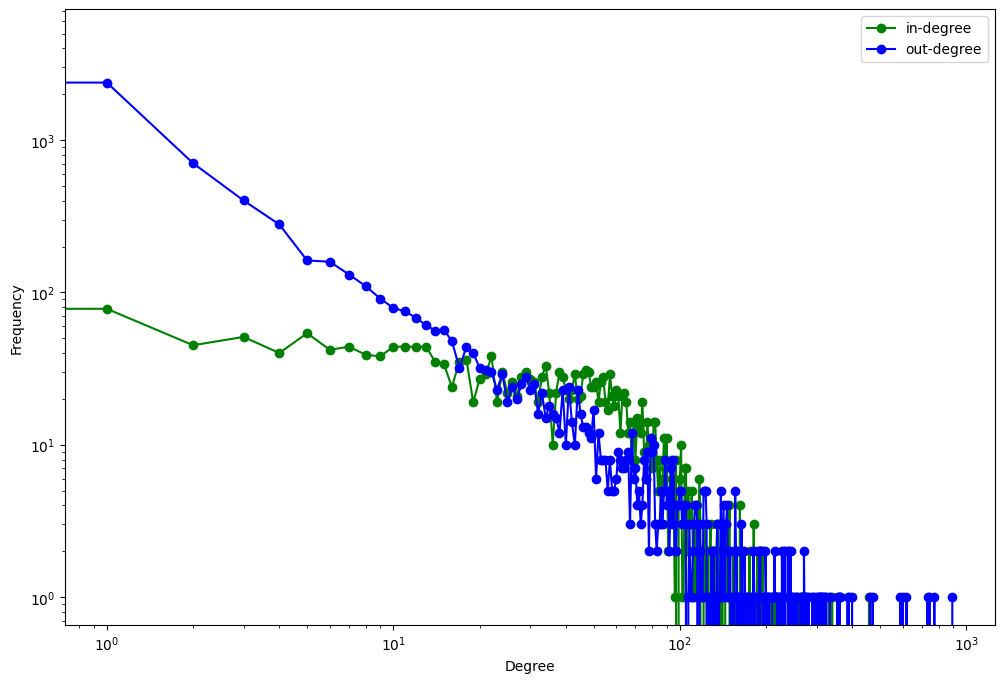

In [11]:
# The in-degere and out-degree distribution are similar to each other, so they overlap with each other.
# https://stackoverflow.com/a/62662992/20285050
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc="upper right")

In [12]:
r = nx.degree_pearson_correlation_coefficient(G)
print(f"The assortiativity value in the graph network is: {r}")

The assortiativity value in the graph network is: -0.08324455771686812


In [13]:
deg_centrality = nx.degree_centrality(G)
deg_centrality_dict = {}
# print(deg_centrality) → output limit exceeded

with open("degree_centrality_data.txt", "w") as fp:
    json.dump(deg_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE DEGREE CENTRALITY RESULTS INTO A FILE **************** ")

with open("degree_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    deg_centrality_dict = json.load(fp)
    print(" **************** LOAD THE DEGREE CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(deg_centrality_dict)
top_5_nodes_based_on_degree_centrality = c.most_common(5)
print(f"The top five nodes with highest values in degree centrality measurement are: {top_5_nodes_based_on_degree_centrality}")

 **************** WRITE THE DEGREE CENTRALITY RESULTS INTO A FILE **************** 
 **************** LOAD THE DEGREE CENTRALITY RESULTS FROM A FILE **************** 
The top five nodes with highest values in degree centrality measurment are: [('2565', 0.16404273263986505), ('1549', 0.11695248805172898), ('766', 0.10865898228844531), ('11', 0.10444194545965702), ('1166', 0.10444194545965702)]


In [14]:
close_centrality = nx.closeness_centrality(G)
closeness_centrality_dict = {}


with open("closeness_centrality_data.txt", "w") as fp:
    json.dump(close_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE CLOSENESS CENTRALITY RESULTS INTO A FILE **************** ")

with open("closeness_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    closeness_centrality_dict = json.load(fp)
    print(" **************** LOAD THE CLOSENESS CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(closeness_centrality_dict)
top_5_nodes_based_on_closeness_centrality = c.most_common(5)
print(f"The top five nodes with highest values in closeness centrality measurement are: {top_5_nodes_based_on_closeness_centrality}")

 **************** WRITE THE CLOSENESS CENTRALITY RESULTS INTO A FILE **************** 
 **************** LOAD THE CLOSENESS CENTRALITY RESULTS FROM A FILE **************** 
The top five nodes with highest values in closeness centrality measurement are: [('4037', 0.29648297322467565), ('15', 0.29148957578089163), ('2398', 0.2909224754389055), ('1549', 0.28192713494645066), ('2535', 0.27990070450658394)]


In [ ]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
betweenness_centrality_dict = {}
# parameters normalized
# and endpoints ensure whether we normalize the value
# and consider the endpoints respectively.

with open("betweenness_centrality_data.txt", "w") as fp:
    json.dump(bet_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE BETWEENNESS CENTRALITY RESULTS INTO A FILE **************** ")

with open("betweenness_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    betweenness_centrality_dict = json.load(fp)
    print(" **************** LOAD THE BETWEENNESS CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(betweenness_centrality_dict)
top_5_nodes_based_on_bet_centrality = c.most_common(5)
print(f"The top five nodes with highest values in betweenness centrality measurement are: {top_5_nodes_based_on_bet_centrality}")

In [16]:
# https://stackoverflow.com/a/56708233/20285050

eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
eigenvector_centrality_dict = {}


with open("eigenvector_centrality_data.txt", "w") as fp:
    json.dump(eigenvector_centrality, fp)  # encode dict into JSON

with open("eigenvector_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    eigenvector_centrality_dict = json.load(fp)

c = Counter(eigenvector_centrality_dict)
top_5_nodes_based_on_ev_centrality = c.most_common(5)
print(f"The top five nodes with highest values in eigenvector centrality measurment are: {top_5_nodes_based_on_ev_centrality}")

The top five nodes with highest values in eigenvector centrality measurment are: [('2398', 0.11719694619047785), ('4037', 0.10896914427330909), ('15', 0.09818046327225058), ('4191', 0.09568565337813764), ('2625', 0.09549308500963676)]


In [17]:
pr_centrality = nx.pagerank(G, alpha = 0.8)
pr_centrality_dict = {}


with open("page_rank_centrality_data.txt", "w") as fp:
    json.dump(pr_centrality, fp)  # encode dict into JSON

with open("page_rank_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    pr_centrality_dict = json.load(fp)

c = Counter(pr_centrality_dict)
top_5_nodes_based_on_pr_centrality = c.most_common(5)
print(f"The top five nodes with highest values in page rank centrality measurment are: {top_5_nodes_based_on_pr_centrality}")

The top five nodes with highest values in page rank centrality measurment are: [('4037', 0.004519226433837483), ('15', 0.0035425741336643926), ('6634', 0.003219620121295295), ('2625', 0.0031132124801420864), ('2470', 0.0025349987385096134)]


In [18]:
N = G.order()
sum_in_degrees = sum(d for n, d in G.in_degree())
max_in = max(d for n, d in G.in_degree())
centralization = float(N * max_in - sum_in_degrees) / (N - 1) ** 2
print(f"The in degree centralization value of the graph network is: {centralization}")

The in degree centralization value of the graph network is: 0.06219973223732792
